In [1]:
# import the required packages
import pandas as pd  
import numpy as np  
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt  
import random
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from xgboost import XGBClassifier, XGBRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_val_score, cross_validate

%matplotlib inline

## 1. HR Analytics

### 1.1 Load and Sample the data

In [2]:
# Load the full dataset
df = pd.read_csv('hr_data_new.csv')

# Create a copy of the DataFrame
df_new = df.copy()

In [3]:
# Show overview of the dataset
df_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_group,good_conduct
0,0,6,1,1,1,1,0.375,5.0,0.060606,1,0,0.155172,1,1,0.0
1,0,27,1,0,1,1,0.325,5.0,0.151515,1,0,0.172414,1,1,0.0
2,0,3,0,0,0,1,0.750,4.0,0.484848,1,0,0.103448,1,2,0.0
3,5,21,1,0,0,1,0.175,3.0,0.000000,1,1,0.293103,1,1,0.0
4,0,21,1,0,1,1,0.175,3.0,0.000000,0,0,0.344828,1,1,0.0


In [4]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            9336 non-null   int64  
 1   region                9336 non-null   int64  
 2   education             9336 non-null   int64  
 3   gender                9336 non-null   int64  
 4   recruitment_channel   9336 non-null   int64  
 5   no_of_trainings       9336 non-null   int64  
 6   age                   9336 non-null   float64
 7   previous_year_rating  9336 non-null   float64
 8   length_of_service     9336 non-null   float64
 9   KPIs_met >80%         9336 non-null   int64  
 10  awards_won?           9336 non-null   int64  
 11  avg_training_score    9336 non-null   float64
 12  is_promoted           9336 non-null   int64  
 13  age_group             9336 non-null   int64  
 14  good_conduct          9336 non-null   float64
dtypes: float64(5), int64(

In [5]:
df_new.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_group,good_conduct
count,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,2.045737,13.053985,0.723115,0.304413,0.473329,1.228685,0.364923,3.579799,0.144228,0.508569,0.066945,0.450084,0.500000,1.178663,0.275064
std,1.976441,9.901436,0.479382,0.460183,0.547611,0.567723,0.186246,1.176841,0.125637,0.499953,0.249940,0.251200,0.500027,0.455872,0.446571
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.225000,3.000000,0.060606,0.000000,0.000000,0.224138,0.000000,1.000000,0.000000
50%,2.000000,12.000000,1.000000,0.000000,0.000000,1.000000,0.325000,3.000000,0.121212,1.000000,0.000000,0.413793,0.500000,1.000000,0.000000
75%,3.000000,21.000000,1.000000,1.000000,1.000000,1.000000,0.450000,5.000000,0.181818,1.000000,0.000000,0.689655,1.000000,1.000000,1.000000
max,8.000000,33.000000,2.000000,1.000000,2.000000,7.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [6]:
# Define Model Inputs (X) and Output (y)
X1 = df.drop(['is_promoted'], axis =1)
y1 = df["is_promoted"]

In [7]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=100)

### 1.2 Build the Model(s)

#### 1.2.1 Logistic Regression

In [8]:
# Create the logistic Regression model
log = LogisticRegression()
# Fit the model to the training set
log.fit(X1_train, y1_train)

C:\Users\Public\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 1.2.2 Decision Tree Classifier

In [9]:
# Create the Decision Tree Classifier model
dtc = DecisionTreeClassifier()
# Fit the model to the training set
dtc.fit(X1_train, y1_train)

DecisionTreeClassifier()

#### 1.2.3 Multi-layer Perceptron Classifier 

In [10]:
# Create the ann model
mlpc = MLPClassifier()
# Fit the model to the training set
mlpc.fit(X1_train, y1_train)

C:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

#### 1.2.4 Random Forest Classifier

In [11]:
# Create the Random Forest Classifier model
rfc = RandomForestClassifier()
# Fit the model to the training set
rfc.fit(X1_train, y1_train)

RandomForestClassifier()

#### 1.2.5 Support Vector Classifier

In [12]:
# Build SVC Model and Evaluate both training and testing accuracy
svc = SVC()
svc.fit(X1_train,y1_train)

SVC()

#### 1.2.6 XGBoost Classifier

In [8]:
# Create the XGBoost Classifier model
xgc = XGBClassifier(use_label_encoder=False, eval_metric='error')
xgc.fit(X1_train,y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

### 1.3 Evaluate and Improve the Model(s)

#### 1.3.1 Logistic Regression

#### 1.3.1.1 Evaluation of default model

In [14]:
print('training accuracy is: ', log.score(X1_train,y1_train))
print('testing accuracy is: ', log.score(X1_test,y1_test))

training accuracy is:  0.7415455241009946
testing accuracy is:  0.7436629775080329


#### 1.3.1.2 K-fold validation

In [10]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(log, X1, y1, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

C:\Users\Public\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Public\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

train_score:  [0.74397429 0.73878699 0.74307136 0.74025974 0.73838533]
test_score:  [0.73072805 0.74665238 0.7327263  0.73111944 0.75790037]


C:\Users\Public\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.7408955408833928
cross val testing accuracy is: 0.7398253103319344


#### 1.3.1.3 Statsmodel, P-Value

In [12]:
# The lg model refers to sklearn model and lg2 model refers to statsmodel.api model

# Create another model lg2 using statsmodel.api: the Logit method and fit function
lg = sm.Logit(y1_train, X1_train).fit()

Optimization terminated successfully.
         Current function value: 0.534795
         Iterations 6


In [13]:
# Print out the Model Summary
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6535
Model:                          Logit   Df Residuals:                     6521
Method:                           MLE   Df Model:                           13
Date:                Thu, 27 Jan 2022   Pseudo R-squ.:                  0.2285
Time:                        09:34:29   Log-Likelihood:                -3494.9
converged:                       True   LL-Null:                       -4529.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
department              -0.2881      0.019    -14.943      0.000      -0.326      -0.250
region                  -0.0215      0.003     -7.261      0.000      -0.027      -0.016
education               -0.6189      0.062     -9.996      0.000      -0.740      -0.498
gender                  -0.1722      0.064     -2.677      0.007      -0.298      -0.046
recruitment_channel     -0.1265      0.053     -2.401      0.016      -0.230      -0.023
no_of_trainings         -0.4518      0.051     -8.775      0.000      -0.553      -0.351
age                     -1.5876      0.326     -4.872      0.000      -2.226      -0.949
previous_year_rating     0.1812      0.024      7.636      0.000       0.135       0.228
length_of_service        0.9260      0.314      2.948      0.003       0.310       1.542
KPIs_met >80%            1.5983      0.062     25.828      0.000       1.477       1.720
awards_won?              1.9757      0.170     11.654      0.000       1.643       2.308
avg_training_score       3.2615      0.209     15.602      0.000       2.852       3.671
age_group               -0.4830      0.108     -4.455      0.000      -0.695      -0.271
good_conduct             0.0786      0.108      0.727      0.467      -0.133       0.290
========================================================================================
"""

In [14]:
# Define Model Inputs (X) and Output (y)
X3 = df.drop(['is_promoted', 'good_conduct'], axis =1)
y3 = df["is_promoted"]

In [15]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=100)

In [16]:
# The lg model refers to sklearn model and lg2 model refers to statsmodel.api model

# Create another model lg2 using statsmodel.api: the Logit method and fit function
lg = sm.Logit(y3_train, X3_train).fit()

Optimization terminated successfully.
         Current function value: 0.534836
         Iterations 6


In [17]:
# Print out the Model Summary
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6535
Model:                          Logit   Df Residuals:                     6522
Method:                           MLE   Df Model:                           12
Date:                Thu, 27 Jan 2022   Pseudo R-squ.:                  0.2284
Time:                        09:34:33   Log-Likelihood:                -3495.2
converged:                       True   LL-Null:                       -4529.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
department              -0.2869      0.019    -14.951      0.000      -0.325      -0.249
region                  -0.0216      0.003     -7.333      0.000      -0.027      -0.016
education               -0.6213      0.062    -10.048      0.000      -0.742      -0.500
gender                  -0.1809      0.063     -2.861      0.004      -0.305      -0.057
recruitment_channel     -0.1277      0.053     -2.425      0.015      -0.231      -0.024
no_of_trainings         -0.4548      0.051     -8.863      0.000      -0.555      -0.354
age                     -1.6028      0.325     -4.928      0.000      -2.240      -0.965
previous_year_rating     0.1791      0.024      7.604      0.000       0.133       0.225
length_of_service        0.9287      0.314      2.956      0.003       0.313       1.544
KPIs_met >80%            1.5983      0.062     25.824      0.000       1.477       1.720
awards_won?              1.9766      0.170     11.661      0.000       1.644       2.309
avg_training_score       3.3652      0.153     21.971      0.000       3.065       3.665
age_group               -0.4863      0.108     -4.489      0.000      -0.699      -0.274
========================================================================================
"""

#### 1.3.1.4 Grid Search

In [18]:
sorted(LogisticRegression().get_params().keys())

['C',
 'class_weight',
 'dual',
 'fit_intercept',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'random_state',
 'solver',
 'tol',
 'verbose',
 'warm_start']

In [19]:
# Use GridSearch to find the best combination of model hyperparameters

param_grid = { 'C': [1, 10, 100], 'max_iter' : [500, 1000, 1500, 2000], 
               'class_weight' : ['balanced', None], 'penalty' : ['l2', 'none'] }

# Create the logistic Regression model
log = LogisticRegression()

gs_log = GridSearchCV(log, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_log = gs_log.fit(X3_train, y3_train) # 

print("Best cross-validation score: {:.3f}".format(gs_log.best_score_))
print("Test score: {:.3f}".format(gs_log.score(X3_test, y3_test)))
print(gs_log.best_params_)

Best cross-validation score: 0.742
Test score: 0.742
{'C': 100, 'class_weight': None, 'max_iter': 500, 'penalty': 'l2'}


In [20]:
log_final = LogisticRegression(C=100, max_iter=500, penalty='l2', class_weight='none', random_state=100)
log_final.fit(X3_train, y3_train)

print('***Final Model***')
# calculated the training accuracy
print(log_final.score(X3_train, y3_train), '(Train Accuracy)')
# calculated the testing accuracy
print(log_final.score(X3_test, y3_test), '(Test Accuracy)')

***Final Model***
0.7415455241009946 (Train Accuracy)
0.7418779007497323 (Test Accuracy)


#### 1.3.2 Decision Tree Classifier

#### 1.3.2.1 Evaluation of default model

In [49]:
print('training accuracy is: ', dtc.score(X1_train,y1_train))
print('testing accuracy is: ', dtc.score(X1_test,y1_test))

training accuracy is:  0.9998469778117827
testing accuracy is:  0.7572295608711175


#### 1.3.2.2 K-folds cross validation

In [15]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(dtc, X1, y1, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.9998661  1.         1.         0.99986611 0.99986611]
test_score:  [0.74892934 0.76272094 0.75147295 0.77450455 0.75736476]


In [16]:
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.9999196643752937
cross val testing accuracy is: 0.7589985078375802


#### 1.3.2.3 Grid Search

In [17]:
sorted(DecisionTreeClassifier().get_params().keys())

['ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'random_state',
 'splitter']

In [38]:
# Use GridSearch to find the best combination of model hyperparameters

param_grid = { 'ccp_alpha' : [0.01, 0.1, 1], 'criterion': ["gini", "entropy"], "splitter" : ["best", "random"],
               "max_features" : ["auto", "sqrt", "log2", None],
               'class_weight' : ["balanced", None] }

# Create the Decision Tree Classifier model
dtc = DecisionTreeClassifier()

gs_dtc = GridSearchCV(dtc, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_dtc = gs_dtc.fit(X1_train, y1_train) # 

print(gs_dtc.best_params_)

{'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': None, 'splitter': 'best'}


In [39]:
# Create the Decision Tree Classifier model
dtc = DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', criterion='entropy', max_depth=None, 
                                  max_features=None, splitter='best', random_state=100)
# Fit the model to the training set
dtc.fit(X1_train, y1_train)

# calculated the training accuracy
print(dtc.score(X1_train, y1_train), '(Train Accuracy)')
# calculated the testing accuracy
print(dtc.score(X1_test, y1_test), '(Test Accuracy)')

results  = cross_validate(dtc, X1, y1, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

0.7912777352716144 (Train Accuracy)
0.791146019278829 (Test Accuracy)
cross val training accuracy is: 0.8015744850183472
cross val testing accuracy is: 0.7984155093136855


#### 1.3.2.4 Tuning parameters

In [40]:
depth_range = range(2,20)

train = []
test = []
cross_val_train =[]
cross_val_test =[]

for d in depth_range:
    # Create Decision Tree Model
    dtc = DecisionTreeClassifier(max_depth=d,ccp_alpha=0.01, class_weight='balanced', criterion='entropy', 
                                  max_features=None, splitter='best', random_state=100)
    dtc.fit(X1_train, y1_train) 
    train.append(dtc.score(X1_train, y1_train))
    test.append(dtc.score(X1_test, y1_test))
    
    results  = cross_validate(dtc, X1, y1, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))
    

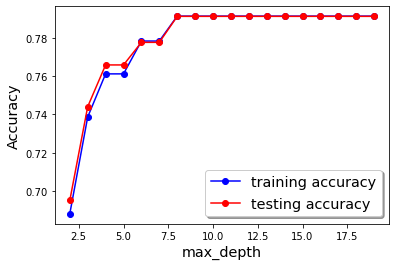

In [41]:
# Plot the simple split measures (train & test) 
plt.plot(depth_range, train, 'bo-', label ='training accuracy')
plt.plot(depth_range, test, 'ro-', label = 'testing accuracy')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

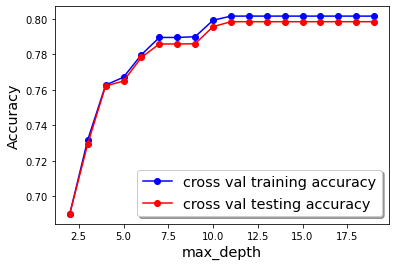

In [42]:
# Plot the cross validation measures (cross_val_train & cross val_test) 
plt.plot(depth_range, cross_val_train, 'bo-', label ='cross val training accuracy')
plt.plot(depth_range, cross_val_test, 'ro-', label = 'cross val testing accuracy')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [102]:
# Create the Decision Tree Classifier model
dtc_final = DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', criterion='entropy', max_depth=10, 
                                  max_features=None, splitter='best', random_state=100)

# Fit the model to the training set
dtc_final.fit(X1_train, y1_train)

print('***Final Model***')
# calculated the training accuracy
print(dtc_final.score(X1_train, y1_train), '(Train Accuracy)')
# calculated the testing accuracy
print(dtc_final.score(X1_test, y1_test), '(Test Accuracy)')

results  = cross_validate(dtc_final, X1, y1, scoring='accuracy', cv=200, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
0.7912777352716144 (Train Accuracy)
0.791146019278829 (Test Accuracy)
cross val training accuracy is: 0.799978387228618
cross val testing accuracy is: 0.7983395004625362


#### 1.3.3 Multi-layer Perceptron Classifier 

#### 1.3.3.1 Evaluation of default model

In [51]:
print('training accuracy is: ', mlpc.score(X1_train,y1_train))
print('testing accuracy is: ', mlpc.score(X1_test,y1_test))

training accuracy is:  0.8163733741392502
testing accuracy is:  0.7975722956087111


#### 1.3.3.2 K-folds cross validation

In [377]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(mlpc, X1, y1, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

C:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


train_score:  [0.8189609  0.81296024 0.82005623 0.81041639 0.82099344]
test_score:  [0.80353319 0.78361007 0.79217997 0.78789502 0.80342796]


C:\Users\Public\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [378]:
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.816677439038689
cross val testing accuracy is: 0.7941292412222198


#### 1.3.3.3 Grid Search

In [190]:
sorted(MLPClassifier().get_params().keys())

['activation',
 'alpha',
 'batch_size',
 'beta_1',
 'beta_2',
 'early_stopping',
 'epsilon',
 'hidden_layer_sizes',
 'learning_rate',
 'learning_rate_init',
 'max_fun',
 'max_iter',
 'momentum',
 'n_iter_no_change',
 'nesterovs_momentum',
 'power_t',
 'random_state',
 'shuffle',
 'solver',
 'tol',
 'validation_fraction',
 'verbose',
 'warm_start']

In [400]:
# Use GridSearch to find the best combination of model hyperparameters

param_grid = { 'alpha' : [0.0001, 0.001, 0.01, 0.1, 1], "activation" : ["identity", "logistic", "tanh", "relu"] }

# Create the model
mlpc = MLPClassifier(max_iter=1000)

gs_mlpc = GridSearchCV(mlpc, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_mlpc = gs_mlpc.fit(X1_train, y1_train) # 

print(gs_mlpc.best_params_)

{'activation': 'tanh', 'alpha': 0.001}


In [46]:
# Create the model
mlpc = MLPClassifier(alpha=0.001, activation='tanh', max_iter=1000, random_state=150)
# Fit the model to the training set
mlpc.fit(X1_train, y1_train)

# calculated the training accuracy
print(mlpc.score(X1_train, y1_train), '(Train Accuracy)')
# calculated the testing accuracy
print(mlpc.score(X1_test, y1_test), '(Test Accuracy)')

# Evaluate the Model using K-folds Cross validation
results  = cross_validate(mlpc, X1, y1, scoring='accuracy', cv=5, return_train_score = True)

print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

0.8299923488905891 (Train Accuracy)
0.7997143877186719 (Test Accuracy)
cross val training accuracy is: 0.8263713045522995
cross val testing accuracy is: 0.7999150121173682


In [103]:
# Create the model
mlpc_final = MLPClassifier(alpha=0.002, activation='tanh', max_iter=1000, random_state=150)
# Fit the model to the training set
mlpc_final.fit(X1_train, y1_train)

print('***Final Model***')
# calculated the training accuracy
print(mlpc_final.score(X1_train, y1_train), '(Train Accuracy)')
# calculated the testing accuracy
print(mlpc_final.score(X1_test, y1_test), '(Test Accuracy)')

# Evaluate the Model using K-folds Cross validation
results  = cross_validate(mlpc_final, X1, y1, scoring='accuracy', cv=5, return_train_score = True)

print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
0.8295332823259373 (Train Accuracy)
0.8004284184219922 (Test Accuracy)
cross val training accuracy is: 0.82337194056806
cross val testing accuracy is: 0.8002360965673383


#### 1.3.4 Random Forest Classifier

#### 1.3.4.1 Evaluation of default model

In [54]:
print('training accuracy is: ', rfc.score(X1_train,y1_train))
print('testing accuracy is: ', rfc.score(X1_test,y1_test))

training accuracy is:  0.9998469778117827
testing accuracy is:  0.7918600499821492


#### 1.3.4.2 K-fold cross validation

In [10]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(rfc, X1, y1, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.9998661  1.         1.         0.99986611 0.99986611]
test_score:  [0.79925054 0.79271559 0.79539368 0.79432244 0.7959293 ]


In [11]:
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.9999196643752937
cross val testing accuracy is: 0.7955223084589896


#### 1.3.4.3 Grid Search

In [224]:
sorted(RandomForestClassifier().get_params().keys())

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [225]:
# Use GridSearch to find the best combination of model hyperparameters

param_grid = { 'criterion' : ['gini', 'entropy'], 'ccp_alpha' : [0.01, 0.1, 0, 1, 10, 100], 
               'class_weight' : ['balanced', 'balanced_subsample', None], 'bootstrap' : [True, False], 
               'max_features' : ['auto', 'sqrt', 'log2'] }

rfc = RandomForestClassifier()

gs_rfc = GridSearchCV(rfc, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_rfc = gs_rfc.fit(X1_train, y1_train) # 

print(gs_rfc.best_params_)

{'bootstrap': True, 'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2'}


In [15]:
# Create the Random Forest Classifier model
rfc = RandomForestClassifier(ccp_alpha=0, class_weight='balanced', criterion='gini', max_features='log2', random_state=1000)
# Fit the model to the training set
rfc.fit(X1_train, y1_train)

# calculated the training accuracy
print(rfc.score(X1_train, y1_train), '(Train Accuracy)')
# calculated the testing accuracy
print(rfc.score(X1_test, y1_test), '(Test Accuracy)')


0.9998469778117827 (Train Accuracy)
0.7900749732238487 (Test Accuracy)


#### 1.3.4.4 Feature Importances

In [105]:
pd.concat((pd.DataFrame(X1_train.columns, columns = ['feature']), 
           pd.DataFrame(rfc.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
11,avg_training_score,0.210768
9,KPIs_met >80%,0.154480
0,department,0.111485
6,age,0.104784
1,region,0.097471
7,previous_year_rating,0.083326
8,length_of_service,0.082795
10,awards_won?,0.029400
4,recruitment_channel,0.028761
5,no_of_trainings,0.023125


In [106]:
# Define Model Inputs (X) and Output (y)
X5 = df.drop(['is_promoted', 'age_group', 'education', 'gender', 'no_of_trainings', 'good_conduct', 'recruitment_channel',
              'awards_won?'], axis =1)
y5 = df["is_promoted"]

In [107]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=100)

In [108]:
rfc = RandomForestClassifier()
rfc.fit(X5_train, y5_train)

# calculated the training accuracy
print(rfc.score(X5_train, y5_train), '(Train Accuracy)')
# calculated the testing accuracy
print(rfc.score(X5_test, y5_test), '(Test Accuracy)')

0.9984697781178271 (Train Accuracy)
0.7847197429489468 (Test Accuracy)


#### 1.3.4.5 Tuning Parameters

In [60]:

depth_range = range(2,10)

train = []
test = []
cross_val_train =[]
cross_val_test =[]

for d in depth_range:
    # Create Random Forest Model
    rfc = RandomForestClassifier(max_depth=d,random_state=1)
    rfc.fit(X5_train, y5_train) 
    train.append(rfc.score(X5_train, y5_train))
    test.append(rfc.score(X5_test, y5_test))
    
    results  = cross_validate(rfc, X5, y5, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))
    

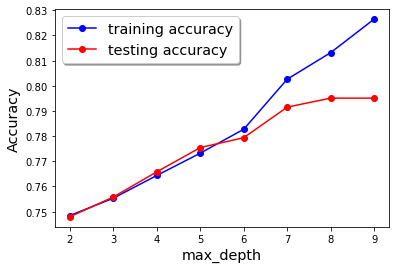

In [61]:

plt.plot(depth_range, train, 'bo-', label ='training accuracy')
plt.plot(depth_range, test, 'ro-', label = 'testing accuracy')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

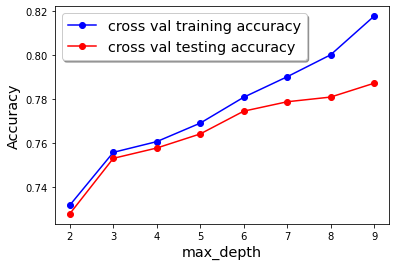

In [62]:

plt.plot(depth_range, cross_val_train, 'bo-', label ='cross val training accuracy')
plt.plot(depth_range, cross_val_test, 'ro-', label = 'cross val testing accuracy')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [109]:
rfc_final = RandomForestClassifier(max_depth=7, random_state=1)

rfc_final = rfc_final.fit(X5_train, y5_train) # 

print('***Final Model***')
# calculated the training accuracy
print(rfc_final.score(X5_train, y5_train), '(Train Accuracy)')
# calculated the testing accuracy
print(rfc_final.score(X5_test, y5_test), '(Test Accuracy)')

***Final Model***
0.8026013771996939 (Train Accuracy)
0.7915030346304891 (Test Accuracy)


#### 1.3.5 Support Vector Classifier

#### 1.3.5.1 Evaluation of default model

In [99]:
print('training accuracy is: ', svc.score(X1_train,y1_train))
print('testing accuracy is: ', svc.score(X1_test,y1_test))

training accuracy is:  0.7263963274674828
testing accuracy is:  0.7315244555515887


#### 1.3.5.2 K-folds cross validation

In [243]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(svc, X1, y1, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.72723621 0.72914714 0.72325613 0.72432722 0.72405945]
test_score:  [0.72055675 0.73594001 0.71772898 0.71933583 0.72790573]


In [244]:
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.7256052279075598
cross val testing accuracy is: 0.7242934593738424


#### 1.3.5.3 Grid Search

In [245]:
sorted(SVC().get_params().keys())

['C',
 'break_ties',
 'cache_size',
 'class_weight',
 'coef0',
 'decision_function_shape',
 'degree',
 'gamma',
 'kernel',
 'max_iter',
 'probability',
 'random_state',
 'shrinking',
 'tol',
 'verbose']

In [14]:
svc = SVC()

param_grid = { "kernel" : ['linear', 'rbf'],  "C" : [0.001, 0.01, 0.1, 1, 10], "gamma" : ['auto', 'scale'] }

gs_svc = GridSearchCV(svc, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)

# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_svc = gs_svc.fit(X1_train, y1_train) # 

print(gs_svc.best_score_)
print(gs_svc.best_params_)

0.7892905479766404
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [110]:
svc_final = SVC(C=10, gamma='auto', kernel='rbf', random_state=5)
svc_final.fit(X1_train, y1_train)

print('***Final Model***')
print('training accuracy is: ', svc_final.score(X1_train, y1_train))
print('testing accuracy is: ', svc_final.score(X1_test,y1_test))
results  = cross_validate(svc_final, X1, y1, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training accuracy is:  0.8433052792654935
testing accuracy is:  0.791146019278829
cross val training accuracy is: 0.8425181950060608
cross val testing accuracy is: 0.786847580368602


#### 1.3.6 XGBoost Classifier

#### 1.3.6.1 Evaluation of default model

In [9]:
print('training accuracy is: ', xgc.score(X1_train,y1_train))
print('testing accuracy is: ', xgc.score(X1_test,y1_test))

training accuracy is:  0.9355776587605202
testing accuracy is:  0.7993573723670118


#### 1.3.6.2 K-fold Cross Validation

In [10]:
results  = cross_validate(xgc, X1, y1, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

cross val training accuracy is: 0.9312874754663498
cross val testing accuracy is: 0.8011992925704993


#### 1.3.6.3 Grid Search

In [11]:
sorted(XGBClassifier(use_label_encoder=False).get_params().keys())

['base_score',
 'booster',
 'colsample_bylevel',
 'colsample_bynode',
 'colsample_bytree',
 'enable_categorical',
 'gamma',
 'gpu_id',
 'importance_type',
 'interaction_constraints',
 'learning_rate',
 'max_delta_step',
 'max_depth',
 'min_child_weight',
 'missing',
 'monotone_constraints',
 'n_estimators',
 'n_jobs',
 'num_parallel_tree',
 'objective',
 'predictor',
 'random_state',
 'reg_alpha',
 'reg_lambda',
 'scale_pos_weight',
 'subsample',
 'tree_method',
 'use_label_encoder',
 'validate_parameters',
 'verbosity']

In [13]:

xgc = XGBClassifier(use_label_encoder=False, eval_metric='error')

param_grid = { "booster" : ['gbtree', 'gblinear'], "eta" : [0.01, 0.1, 0.2, 0.3], 
               "alpha" : [0.1, 0, 1, 10, 20], 'subsample' : [0.01, 0.1, 1, 10] }

gs_xgc = GridSearchCV(xgc, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_xgc = gs_xgc.fit(X1_train, y1_train) # 

print(gs_xgc.best_score_)
print(gs_xgc.best_params_)

C:\Users\Public\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.75118905 0.7941882  0.80658382        nan 0.74996534 0.80000304
 0.81239914        nan 0.73543116 0.78592546 0.80781011        nan
 0.71630466 0.7761311  0.80291199        nan 0.56802244 0.56802244
 0.56802244 0.56802244 0.59005742 0.59005742 0.59005742 0.59005742
 0.60000281 0.60000281 0.60000281 0.60000281 0.60000281 0.60000281
 0.60000281 0.60000281 0.75088324 0.79418867 0.8059722         nan
 0.7488915  0.80122675 0.81499946        nan 0.72716397 0.78745732
 0.8078087         nan 0.7233383  0.77215205 0.80000656        nan
 0.71676033 0.71706637 0.71706637 0.71721928 0.73450927 0.73496822
 0.73450974 0.73466265 0.74001831 0.73986541 0.73971227 0.73955936
 0.74216133 0.74231446 0.74170191 0.74170214 0.74721329 0.790821
 0.80383036        nan 0.75027092 0.79893154 0.81102369        nan
 0.74185341 0.79005742 0.80887927        nan 0.72945989

0.8165285134242802
{'alpha': 10, 'booster': 'gbtree', 'eta': 0.2, 'subsample': 1}


In [23]:
xgc = XGBClassifier(alpha=10, booster='gbtree', eta=0.2, subsample=1, use_label_encoder=False, eval_metric='error',
                    random_state=1)
xgc.fit(X1_train,y1_train)

print('training accuracy is: ', xgc.score(X1_train,y1_train))
print('testing accuracy is: ', xgc.score(X1_test,y1_test))
results  = cross_validate(xgc, X1, y1, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

training accuracy is:  0.826778882938026
testing accuracy is:  0.8182791860049982
cross val training accuracy is: 0.8299057672624064
cross val testing accuracy is: 0.812982673253132


#### 1.3.6.4 Tuning Parameters

In [35]:

depth_range = range(1,10)

train = []
test = []
cross_val_train =[]
cross_val_test =[]

for d in depth_range:
    xgc = XGBClassifier(max_depth=d, alpha=10, booster='gbtree', eta=0.2, subsample=1, use_label_encoder=False,
                        eval_metric='error', random_state=1)
    xgc.fit(X1_train, y1_train) 
    train.append(xgc.score(X1_train, y1_train))
    test.append(xgc.score(X1_test, y1_test))
    
    results  = cross_validate(xgc, X1, y1, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test.append(sum(results['test_score'])/len(results['test_score']))
    

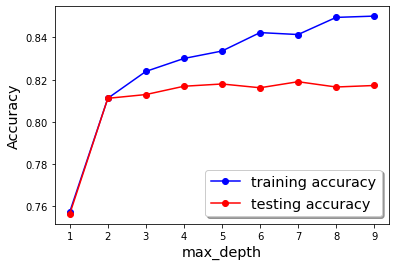

In [36]:
plt.plot(depth_range, train, 'bo-', label ='training accuracy')
plt.plot(depth_range, test, 'ro-', label = 'testing accuracy')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

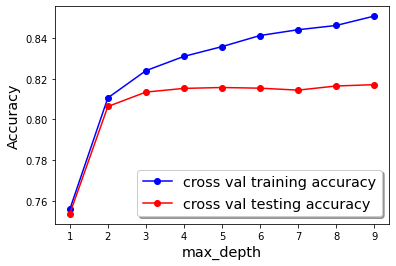

In [37]:
plt.plot(depth_range, cross_val_train, 'bo-', label ='cross val training accuracy')
plt.plot(depth_range, cross_val_test, 'ro-', label = 'cross val testing accuracy')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [111]:
xgc_final = XGBClassifier(alpha=10, booster='gbtree', eta=0.2, subsample=1, use_label_encoder=False, eval_metric='error',
                    max_depth=4, random_state=1)
xgc_final.fit(X1_train,y1_train)

print('training accuracy is: ', xgc_final.score(X1_train,y1_train))
print('testing accuracy is: ', xgc_final.score(X1_test,y1_test))
results  = cross_validate(xgc_final, X1, y1, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

training accuracy is:  0.8299923488905891
testing accuracy is:  0.8168511245983577
cross val training accuracy is: 0.8309501303835894
cross val testing accuracy is: 0.8152318701119065


## 2. Airbnb

### 2.1 Load and Sample the data

#### 2.1.1 Load and Display data

In [148]:
# Load the full dataset
df2 = pd.read_csv('listings_new.csv')

# Create a copy of the DataFrame
df2_new = df2.copy()

In [149]:
df2_new.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,1.33235,103.78521,1,81,0.089089,0.058632,0.797847,0.28,0.000000,1.000000
1,6,1.28875,103.80814,1,44,0.014014,0.058632,0.059897,0.23,0.113553,0.906849
2,6,1.28837,103.81099,1,40,0.029029,0.032573,0.162845,0.11,0.113553,0.756164
3,0,1.31125,103.83816,1,65,0.001001,0.407166,0.002340,1.35,0.018315,0.920548
4,6,1.28976,103.80896,1,44,0.029029,0.042345,0.096397,0.15,0.113553,0.931507


In [150]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6024 entries, 0 to 6023
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   6024 non-null   int64  
 1   latitude                        6024 non-null   float64
 2   longitude                       6024 non-null   float64
 3   room_type                       6024 non-null   int64  
 4   price                           6024 non-null   int64  
 5   minimum_nights                  6024 non-null   float64
 6   number_of_reviews               6024 non-null   float64
 7   last_review                     6024 non-null   float64
 8   reviews_per_month               6024 non-null   float64
 9   calculated_host_listings_count  6024 non-null   float64
 10  availability_365                6024 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 517.8 KB


In [151]:
df2_new.describe()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000
mean,2.396746,1.303842,103.851188,0.476262,144.686421,0.014718,0.043168,0.401993,0.711295,0.172584,0.584569
std,2.268605,0.016346,0.025284,0.603081,86.657481,0.036327,0.095415,0.443818,1.151071,0.251658,0.393627
min,0.000000,1.245260,103.763270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.291170,103.839397,0.000000,75.000000,0.001001,0.000000,0.014038,0.000000,0.006410,0.167123
50%,2.000000,1.306340,103.849555,0.000000,131.000000,0.002002,0.006515,0.112775,0.200000,0.047619,0.723288
75%,4.000000,1.314660,103.862700,1.000000,199.000000,0.009009,0.035831,1.000000,0.950000,0.241758,0.967808
max,7.000000,1.365830,103.918220,2.000000,400.000000,1.000000,1.000000,1.000000,13.000000,1.000000,1.000000


#### 2.1.2 Sample data

In [152]:
# Define Model Inputs (X) and Output (y)
X2 = df2.drop(['price'], axis =1)
y2 = df2["price"]

In [153]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=10)

Text(0.5, 0, 'X')

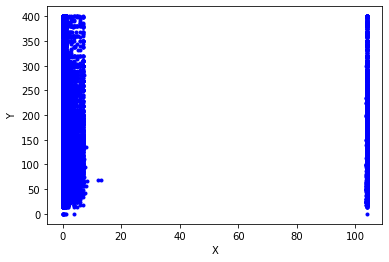

In [154]:
plt.plot(X2,y2, 'b.')
plt.ylabel('Y')
plt.xlabel('X')

### 2.2 Build the Model(s)

#### 2.2.1 Linear Regression

In [155]:
# Create the model "lin"
lin = LinearRegression() # maximum iterations: set a big number to make sure the optimization solver will
# run enough iterations to let the model converge

# Fit the model to the training set
lin.fit(X2_train, y2_train.ravel())

LinearRegression()

#### 2.2.2 Decision Tree Regressor

In [156]:
dtr = DecisionTreeRegressor()
dtr.fit(X2_train, y2_train.ravel())

DecisionTreeRegressor()

#### 2.2.3 Multi-layer Perceptron Regressor 

In [157]:
mlpr = MLPRegressor(max_iter=500)
mlpr.fit(X2_train, y2_train.ravel())

MLPRegressor(max_iter=500)

#### 2.2.4 Random Forest Regressor

In [158]:
rfr = RandomForestRegressor()
rfr.fit(X2_train, y2_train.ravel())

RandomForestRegressor()

#### 2.2.5 Support Vector Regressor

In [159]:
svr = SVR()
svr.fit(X2_train, y2_train.ravel())

SVR()

#### 2.2.6 XGBoost Regressor

In [160]:
xgr = XGBRegressor(use_label_encoder=False)
xgr.fit(X2_train, y2_train.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             use_label_encoder=False, validate_parameters=1, verbosity=None)

### 2.3 Evaluate and Improve the Model(s)

#### 2.3.1 Linear Regression

#### 2.3.1.1 Evaluation of default model

In [68]:
print('the training mean squared error is: ', mean_squared_error(lin.predict(X2_train), y2_train))
print('the testing mean squared error is: ', mean_squared_error(lin.predict(X2_test), y2_test))

print('the training root mean squared error is: ', sqrt(mean_squared_error(lin.predict(X2_train), y2_train)))
print('the testing root mean squared error is: ', sqrt(mean_squared_error(lin.predict(X2_test), y2_test)))

train_R2 = lin.score(X2_train, y2_train)
print('training R^2 value is: ', train_R2)
test_R2 = lin.score(X2_test, y2_test)
print('testing R^2 value is: ', test_R2)

the training mean squared error is:  4674.13376602454
the testing mean squared error is:  4306.263828025038
the training root mean squared error is:  68.3676368322362
the testing root mean squared error is:  65.62212910310849
training R^2 value is:  0.38453643239087476
testing R^2 value is:  0.41057678552776056


#### 2.3.1.2 Stats model

In [70]:
# The lm model refers to sklearn model and lm2 model refers to statsmodel.api model

# Create another model lm2 using statsmodel.api: the Ordinary Least Squares (OLS) method and fit function
lm2 = sm.OLS(y2_train, X2_train).fit()
# Summary statistics from the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.836
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                              2150.
Date:                Fri, 28 Jan 2022   Prob (F-statistic):                        0.00
Time:                        10:34:22   Log-Likelihood:                         -23800.
No. Observations:                4216   AIC:                                  4.762e+04
Df Residuals:                    4206   BIC:                                  4.768e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
neighbourhood                      0.2108      0.550      0.383      0.701      -0.867       1.288
latitude                        -201.5711     77.140     -2.613      0.009    -352.806     -50.337
longitude                          4.1461      0.975      4.255      0.000       2.236       6.057
room_type                        -88.9161      1.888    -47.107      0.000     -92.617     -85.216
minimum_nights                  -279.6339     30.059     -9.303      0.000    -338.565    -220.703
number_of_reviews                -69.2150     14.860     -4.658      0.000     -98.348     -40.082
last_review                       12.3928      2.847      4.353      0.000       6.811      17.974
reviews_per_month                  6.5510      1.403      4.668      0.000       3.800       9.302
calculated_host_listings_count   -19.0835      4.688     -4.071      0.000     -28.274      -9.893
availability_365                  33.3058      2.843     11.714      0.000      27.731      38.880
==============================================================================
Omnibus:                      725.002   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1216.334
Skew:                           1.134   Prob(JB):                    7.52e-265
Kurtosis:                       4.333   Cond. No.                     7.59e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
X4 = df2.drop(['price', 'neighbourhood'], axis = 1)
y4 = df2["price"]

In [72]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=10)

In [73]:
# Create another model lm2 using statsmodel.api: the Ordinary Least Squares (OLS) method and fit function
lm2 = sm.OLS(y4_train, X4_train).fit()
# Summary statistics from the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.836
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                              2390.
Date:                Fri, 28 Jan 2022   Prob (F-statistic):                        0.00
Time:                        10:34:24   Log-Likelihood:                         -23800.
No. Observations:                4216   AIC:                                  4.762e+04
Df Residuals:                    4207   BIC:                                  4.768e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
latitude                        -217.1487     65.568     -3.312      0.001    -345.698     -88.600
longitude                          4.3459      0.824      5.277      0.000       2.731       5.960
room_type                        -88.9381      1.886    -47.146      0.000     -92.637     -85.240
minimum_nights                  -279.1611     30.030     -9.296      0.000    -338.036    -220.286
number_of_reviews                -69.3664     14.853     -4.670      0.000     -98.486     -40.247
last_review                       12.4479      2.843      4.378      0.000       6.874      18.022
reviews_per_month                  6.5867      1.400      4.704      0.000       3.842       9.332
calculated_host_listings_count   -18.8507      4.648     -4.056      0.000     -27.963      -9.739
availability_365                  33.2856      2.843     11.710      0.000      27.713      38.859
==============================================================================
Omnibus:                      724.516   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1214.764
Skew:                           1.134   Prob(JB):                    1.65e-264
Kurtosis:                       4.330   Cond. No.                     6.45e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 2.3.1.3 Grid Search

In [74]:
sorted(LinearRegression().get_params().keys())

['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive']

In [75]:
# Use GridSearch to find the best combination of model hyperparameters

param_grid = { 'fit_intercept' : [True, False], 'normalize' : [True, False], 'copy_X' : [True, False] }

lin = LinearRegression()

gs_lin = GridSearchCV(lin, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)

# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_lin = gs_lin.fit(X4_train, y4_train.ravel()) # 

print(gs_lin.best_params_)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [113]:
# Create the model "lg"
lin_final = LinearRegression(copy_X=True, fit_intercept=True, normalize=True) # maximum iterations: set a big number to make sure the optimization solver will
# run enough iterations to let the model converge

# Fit the model to the training set
lin_final.fit(X4_train, y4_train.ravel())

print('the training mean squared error is: ', mean_squared_error(lin_final.predict(X4_train), y4_train))
print('the testing mean squared error is: ', mean_squared_error(lin_final.predict(X4_test), y4_test))

print('the training root mean squared error is: ', sqrt(mean_squared_error(lin_final.predict(X4_train), y4_train)))
print('the testing root mean squared error is: ', sqrt(mean_squared_error(lin_final.predict(X4_test), y4_test)))

train_R2 = lin_final.score(X4_train, y4_train)
print('training R^2 value is: ', train_R2)
test_R2 = lin_final.score(X4_test, y4_test)
print('testing R^2 value is: ', test_R2)

the training mean squared error is:  4675.107131287562
the testing mean squared error is:  4301.945772567796
the training root mean squared error is:  68.37475507296215
the testing root mean squared error is:  65.58921994175411
training R^2 value is:  0.38440826514377524
testing R^2 value is:  0.4111678227306633


#### 2.3.1.4 K-fold Cross Validation

In [114]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(lin_final, X4, y4.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [-4757.26034374 -4594.45874367 -4543.34382592 -4392.6835585
 -4482.75426539]
test_score:  [-3854.97757716 -4479.38915621 -4670.74183819 -5282.94282833
 -4907.03596593]


In [115]:
print('***Final Model***')
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

print('the training root mean squared error is: ', sqrt(sum(-results['train_score'])/len(results['train_score'])))
print('the testing root mean squared error is: ', sqrt(sum(-results['test_score'])/len(results['test_score'])))

***Final Model***
cross val training mean_squared_error is: 4554.100147446019
cross val testing mean_squared_error is: 4639.017473163056
the training root mean squared error is:  67.48407328730254
the testing root mean squared error is:  68.11033308656665


#### 2.3.2 Decision Tree Regressor

#### 2.3.2.1 Evaluation of default model

In [82]:
print('the training mean squared error is: ', mean_squared_error(dtr.predict(X2_train), y2_train))
print('the testing mean squared error is: ', mean_squared_error(dtr.predict(X2_test), y2_test))

print('the training root mean squared error is: ', sqrt(mean_squared_error(dtr.predict(X2_train), y2_train)))
print('the testing root mean squared error is: ', sqrt(mean_squared_error(dtr.predict(X2_test), y2_test)))

train_R2 = dtr.score(X2_train, y2_train)
print('training R^2 value is: ', train_R2)
test_R2 = dtr.score(X2_test, y2_test)
print('testing R^2 value is: ', test_R2)

the training mean squared error is:  0.0
the testing mean squared error is:  5093.545353982301
the training root mean squared error is:  0.0
the testing root mean squared error is:  71.3690784162322
training R^2 value is:  1.0
testing R^2 value is:  0.3028170136567554


#### 2.3.2.2 Grid Search

In [44]:
sorted(DecisionTreeRegressor().get_params().keys())

['ccp_alpha',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'random_state',
 'splitter']

In [53]:
# Use GridSearch to find the best combination of model hyperparameters

param_grid = { 'criterion' : ["mse", "mae"], "ccp_alpha" : [0.1, 1, 0, 10, 20, 25] }

dtr = DecisionTreeRegressor()

gs_dtr = GridSearchCV(dtr, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_dtr = gs_dtr.fit(X2_train, y2_train.ravel()) # 

print("Best cross-validation score: {:.3f}".format(gs_dtr.best_score_))
print("Test score: {:.3f}".format(gs_dtr.score(X2_test, y2_test)))
print(gs_dtr.best_params_)

Best cross-validation score: -3878.019
Test score: -3565.104
{'ccp_alpha': 20, 'criterion': 'mse'}


In [83]:
dtr = DecisionTreeRegressor(ccp_alpha=20, criterion='mse')
dtr.fit(X2_train, y2_train.ravel())

print('the training mean squared error is: ', mean_squared_error(dtr.predict(X2_train), y2_train))
print('the testing mean squared error is: ', mean_squared_error(dtr.predict(X2_test), y2_test))

print('the training root mean squared error is: ', sqrt(mean_squared_error(dtr.predict(X2_train), y2_train)))
print('the testing root mean squared error is: ', sqrt(mean_squared_error(dtr.predict(X2_test), y2_test)))

train_R2 = dtr.score(X2_train, y2_train)
print('training R^2 value is: ', train_R2)
test_R2 = dtr.score(X2_test, y2_test)
print('testing R^2 value is: ', test_R2)

the training mean squared error is:  3326.66980220576
the testing mean squared error is:  3565.1044862781946
the training root mean squared error is:  57.677290177380556
the testing root mean squared error is:  59.708495930463656
training R^2 value is:  0.5619628861275617
testing R^2 value is:  0.5120235475225794


#### 2.3.2.3 Tuning Parameters

In [137]:
# Plot the cross validation measures (cross# Setting max_depth from 2 to 9 (8 different values)
# Training & evaluating the model 8 times with different max_depth value
# Store both simple split measures (train_mse & test_mse) and 
# cross validation measures (cross_val_train_mse & cross val_test_mse) into arrays

depth_range = range(2,10)

train_mse = []
test_mse = []
cross_val_train_mse =[]
cross_val_test_mse =[]

for d in depth_range:
    # Create Random Forest Model
    dtr = DecisionTreeRegressor(max_depth=d, ccp_alpha=20, criterion='mse')
    dtr.fit(X2_train, y2_train.ravel()) 
    train_mse.append(mean_squared_error(dtr.predict(X2_train), y2_train))
    test_mse.append(mean_squared_error(dtr.predict(X2_test), y2_test))
    
    results  = cross_validate(dtr, X2, y2.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_mse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_mse.append(sum(-results['test_score'])/len(results['test_score']))
    

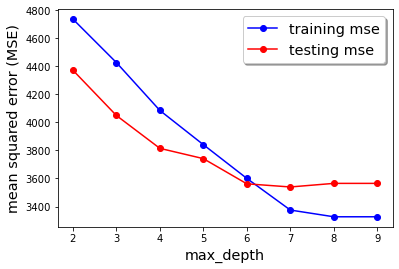

In [138]:
# Plot the simple split measures (train_mse & test_mse) 
plt.plot(depth_range, train_mse, 'bo-', label ='training mse')
plt.plot(depth_range, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

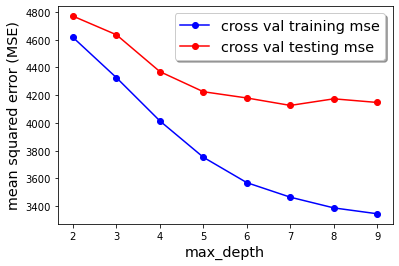

In [139]:
# Plot the cross validation measures (cross_val_train_mse & cross val_test_mse) 
plt.plot(depth_range, cross_val_train_mse, 'bo-', label ='cross val training mse')
plt.plot(depth_range, cross_val_test_mse, 'ro-', label = 'cross val testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [140]:
print('***Final Model***')
dtr_final = DecisionTreeRegressor(max_depth=7,random_state=1,ccp_alpha=20)
dtr_final.fit(X2_train, y2_train.ravel()) 
print('training mse: ', mean_squared_error(dtr_final.predict(X2_train), y2_train))
print('testing mse: ', mean_squared_error(dtr_final.predict(X2_test), y2_test))

print('the training root mean squared error is: ', sqrt(mean_squared_error(dtr_final.predict(X2_train), y2_train)))
print('the testing root mean squared error is: ', sqrt(mean_squared_error(dtr_final.predict(X2_test), y2_test)))

train_R2 = dtr.score(X2_train, y2_train)
print('training R^2 value is: ', train_R2)
test_R2 = dtr.score(X2_test, y2_test)
print('testing R^2 value is: ', test_R2)

***Final Model***
training mse:  3374.708980569952
testing mse:  3539.4664722127986
the training root mean squared error is:  58.09224544265742
the testing root mean squared error is:  59.493415368533
training R^2 value is:  0.5619628861275617
testing R^2 value is:  0.5120235475225794


In [144]:
results  = cross_validate(dtr_final, X2, y2.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('cross val training mse:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mse:', sum(-results['test_score'])/len(results['test_score']))

print('the training root mean squared error is: ', sqrt(sum(-results['train_score'])/len(results['train_score'])))
print('the testing root mean squared error is: ', sqrt(sum(-results['test_score'])/len(results['test_score'])))

cross val training mse: 3464.8448815744705
cross val testing mse: 4125.772287141478
the training root mean squared error is:  58.862933001800634
the testing root mean squared error is:  64.23217485918936


#### 2.3.3 Multi-layer Perceptron Regressor 

#### 2.3.3.1 Evaluation of default model

In [87]:
print('the training mean squared error is: ', mean_squared_error(mlpr.predict(X2_train), y2_train))
print('the testing mean squared error is: ', mean_squared_error(mlpr.predict(X2_test), y2_test))

print('the training root mean squared error is: ', sqrt(mean_squared_error(mlpr.predict(X2_train), y2_train)))
print('the testing root mean squared error is: ', sqrt(mean_squared_error(mlpr.predict(X2_test), y2_test)))

train_R2 = mlpr.score(X2_train, y2_train)
print('training R^2 value is: ', train_R2)
test_R2 = mlpr.score(X2_test, y2_test)
print('testing R^2 value is: ', test_R2)

the training mean squared error is:  4654.6115658221925
the testing mean squared error is:  4307.697140871279
the training root mean squared error is:  68.22471374672226
the testing root mean squared error is:  65.63304915110434
training R^2 value is:  0.38710700558915423
testing R^2 value is:  0.41038059971590257


#### 2.3.3.2 Grid Search

In [61]:
sorted(MLPRegressor().get_params().keys())

['activation',
 'alpha',
 'batch_size',
 'beta_1',
 'beta_2',
 'early_stopping',
 'epsilon',
 'hidden_layer_sizes',
 'learning_rate',
 'learning_rate_init',
 'max_fun',
 'max_iter',
 'momentum',
 'n_iter_no_change',
 'nesterovs_momentum',
 'power_t',
 'random_state',
 'shuffle',
 'solver',
 'tol',
 'validation_fraction',
 'verbose',
 'warm_start']

In [62]:
# Use GridSearch to find the best combination of model hyperparameters

param_grid = { 'activation' : ['identity', 'logistic', 'tanh', 'relu'], 
               "alpha": [0.0001, 0.001, 0.01] }

mlpr = MLPRegressor(max_iter=1000)

gs_mlpr = GridSearchCV(mlpr, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_mlpr = gs_mlpr.fit(X2_train, y2_train.ravel()) # 

print("Best cross-validation score: {:.3f}".format(gs_mlpr.best_score_))
print("Test score: {:.3f}".format(gs_mlpr.score(X2_test, y2_test)))
print(gs_mlpr.best_params_)

Best cross-validation score: -4515.008
Test score: -4105.552
{'activation': 'tanh', 'alpha': 0.001}


In [161]:
mlpr_final = MLPRegressor(max_iter=1000, activation='tanh', alpha=0.001)
mlpr_final.fit(X2_train, y2_train.ravel())

print('the training mean squared error is: ', mean_squared_error(mlpr_final.predict(X2_train), y2_train))
print('the testing mean squared error is: ', mean_squared_error(mlpr_final.predict(X2_test), y2_test))

print('the training root mean squared error is: ', sqrt(mean_squared_error(mlpr_final.predict(X2_train), y2_train)))
print('the testing root mean squared error is: ', sqrt(mean_squared_error(mlpr_final.predict(X2_test), y2_test)))

train_R2 = mlpr_final.score(X2_train, y2_train)
print('training R^2 value is: ', train_R2)
test_R2 = mlpr_final.score(X2_test, y2_test)
print('testing R^2 value is: ', test_R2)

the training mean squared error is:  4531.949269455928
the testing mean squared error is:  4204.213784304522
the training root mean squared error is:  67.3197539319324
the testing root mean squared error is:  64.83990888568954
training R^2 value is:  0.4032584848389489
testing R^2 value is:  0.4245449647218268


#### 2.3.3.3 K-folds Cross Validation

In [162]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(mlpr_final, X2, y2.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [-4563.99547121 -4244.85141152 -4188.24393524 -4211.27531282
 -4227.58150445]
test_score:  [-3608.87497257 -4200.31874061 -4401.57052613 -5053.09320909
 -4778.12794577]


In [163]:
print('***Final Model***')
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

print('the training root mean squared error is: ', sqrt(sum(-results['train_score'])/len(results['train_score'])))
print('the testing root mean squared error is: ', sqrt(sum(-results['test_score'])/len(results['test_score'])))

***Final Model***
cross val training mean_squared_error is: 4287.189527047827
cross val testing mean_squared_error is: 4408.397078834776
the training root mean squared error is:  65.47663344314388
the testing root mean squared error is:  66.39576100049442


#### 2.3.4 Random Forest Regressor

#### 2.3.4.1 Evaluation of default model

In [90]:
print('the training mean squared error is: ', mean_squared_error(rfr.predict(X2_train), y2_train))
print('the testing mean squared error is: ', mean_squared_error(rfr.predict(X2_test), y2_test))

print('the training root mean squared error is: ', sqrt(mean_squared_error(rfr.predict(X2_train), y2_train)))
print('the testing root mean squared error is: ', sqrt(mean_squared_error(rfr.predict(X2_test), y2_test)))

train_R2 = rfr.score(X2_train, y2_train)
print('training R^2 value is: ', train_R2)
test_R2 = rfr.score(X2_test, y2_test)
print('testing R^2 value is: ', test_R2)

the training mean squared error is:  389.5184438804554
the testing mean squared error is:  2522.0666571349557
the training root mean squared error is:  19.736221621183102
the testing root mean squared error is:  50.220181771225754
training R^2 value is:  0.9487104085760645
testing R^2 value is:  0.6547901625331867


#### 2.3.4.2 Grid Search

In [66]:
sorted(RandomForestRegressor().get_params().keys())

['bootstrap',
 'ccp_alpha',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [67]:
# Use GridSearch to find the best combination of model hyperparameters

param_grid = { 'criterion' : ['squared_error', 'absolute_error', 'poisson'],
               "bootstrap": [True, False], 'ccp_alpha' : [0.001, 0.01, 0.1, 1, 0, 10] }

rfr = RandomForestRegressor()

gs_rfr = GridSearchCV(rfr, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_rfr = gs_rfr.fit(X2_train, y2_train.ravel()) # 

print("Best cross-validation score: {:.3f}".format(gs_rfr.best_score_))
print("Test score: {:.3f}".format(gs_rfr.score(X2_test, y2_test)))
print(gs_rfr.best_params_)

C:\Users\Public\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [           nan            nan -4154.44060395            nan
            nan -4253.26226471            nan            nan
 -5454.96307926            nan            nan -7597.4963739
            nan            nan -4168.34446655            nan
            nan -7597.23075226            nan            nan
 -6752.5095826             nan            nan -6256.1921605
            nan            nan -5775.93184089            nan
            nan -7597.41347249            nan            nan
 -6731.50751702            nan            nan -7597.41347249]
  warnings.warn(


Best cross-validation score: -4154.441
Test score: -3719.207
{'bootstrap': True, 'ccp_alpha': 0.001, 'criterion': 'poisson'}


In [91]:
rfr = RandomForestRegressor(ccp_alpha=0.001, criterion='poisson', random_state=100)
rfr.fit(X2_train, y2_train.ravel())

print('the training mean squared error is: ', mean_squared_error(rfr.predict(X2_train), y2_train))
print('the testing mean squared error is: ', mean_squared_error(rfr.predict(X2_test), y2_test))

print('the training root mean squared error is: ', sqrt(mean_squared_error(rfr.predict(X2_train), y2_train)))
print('the testing root mean squared error is: ', sqrt(mean_squared_error(rfr.predict(X2_test), y2_test)))

train_R2 = rfr.score(X2_train, y2_train)
print('training R^2 value is: ', train_R2)
test_R2 = rfr.score(X2_test, y2_test)
print('testing R^2 value is: ', test_R2)

the training mean squared error is:  621.8686277136915
the testing mean squared error is:  3726.531144796459
the training root mean squared error is:  24.937293913207412
the testing root mean squared error is:  61.045320416854715
training R^2 value is:  0.9181158470519369
testing R^2 value is:  0.4899281479453116


#### 2.3.4.3 K-folds Cross Validation

In [69]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(rfr, X2, y2.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [-591.48808542 -593.58770569 -609.28154008 -569.11522913 -572.29973585]
test_score:  [-6081.83480106 -5489.48360733 -4744.8449277  -4957.51569167
 -5808.57634567]


In [70]:
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

print('the training root mean squared error is: ', sqrt(sum(-results['train_score'])/len(results['train_score'])))
print('the testing root mean squared error is: ', sqrt(sum(-results['test_score'])/len(results['test_score'])))

cross val training mean_squared_error is: 587.1544592349995
cross val testing mean_squared_error is: 5416.451074684604
the training root mean squared error is:  24.231270276958234
the testing root mean squared error is:  73.59654254572428


#### 2.3.4.4 Tuning Parameters

In [74]:
# Setting max_depth from 2 to 9 (8 different values)
# Training & evaluating the model 8 times with different max_depth value
# Store both simple split measures (train_mse & test_mse) and 
# cross validation measures (cross_val_train_mse & cross val_test_mse) into arrays

depth_range = range(2,15)

train_mse = []
test_mse = []
cross_val_train_mse =[]
cross_val_test_mse =[]

for d in depth_range:
    # Create Random Forest Model
    rfr = RandomForestRegressor(max_depth=d, ccp_alpha=0.001, criterion='poisson', 
                                random_state=100)
    rfr.fit(X2_train, y2_train.ravel()) 
    train_mse.append(mean_squared_error(rfr.predict(X2_train), y2_train))
    test_mse.append(mean_squared_error(rfr.predict(X2_test), y2_test))
    
    results  = cross_validate(rfr, X2, y2.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_mse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_mse.append(sum(-results['test_score'])/len(results['test_score']))
    

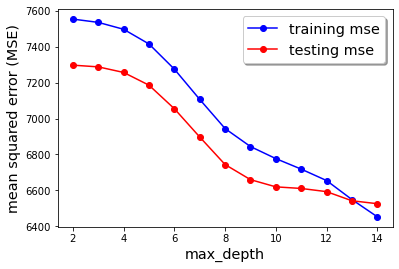

In [75]:
# Plot the simple split measures (train_mse & test_mse) 
plt.plot(depth_range, train_mse, 'bo-', label ='training mse')
plt.plot(depth_range, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

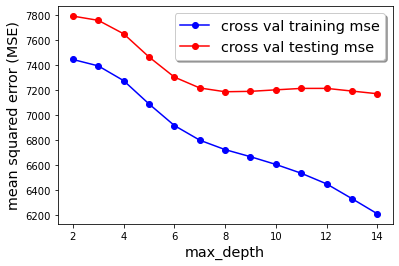

In [76]:
# Plot the cross validation measures (cross_val_train_mse & cross val_test_mse) 
plt.plot(depth_range, cross_val_train_mse, 'bo-', label ='cross val training mse')
plt.plot(depth_range, cross_val_test_mse, 'ro-', label = 'cross val testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [120]:
print('***Final Model***')
rfr_final = RandomForestRegressor(max_depth=13, n_estimators=20, ccp_alpha=0.001, criterion='poisson', random_state=100)

rfr_final.fit(X2_train, y2_train.ravel()) 
print('training mse: ', mean_squared_error(rfr_final.predict(X2_train), y2_train))
print('testing mse: ', mean_squared_error(rfr_final.predict(X2_test), y2_test))

print('the training root mean squared error is: ', sqrt(mean_squared_error(rfr_final.predict(X2_train), y2_train)))
print('the testing root mean squared error is: ', sqrt(mean_squared_error(rfr_final.predict(X2_test), y2_test)))

train_R2 = rfr_final.score(X2_train, y2_train)
print('training R^2 value is: ', train_R2)
test_R2 = rfr_final.score(X2_test, y2_test)
print('testing R^2 value is: ', test_R2)

***Final Model***
training mse:  6644.788744452378
testing mse:  6606.9086981624105
the training root mean squared error is:  81.51557363137658
the testing root mean squared error is:  81.28289302283974
training R^2 value is:  0.12505170125930254
testing R^2 value is:  0.09567422756317845


In [121]:
results  = cross_validate(rfr_final, X2, y2.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('cross val training mse:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mse:', sum(-results['test_score'])/len(results['test_score']))

print('the training root mean squared error is: ', sqrt(sum(-results['train_score'])/len(results['train_score'])))
print('the testing root mean squared error is: ', sqrt(sum(-results['test_score'])/len(results['test_score'])))

cross val training mse: 6358.181416680854
cross val testing mse: 7296.596944786895
the training root mean squared error is:  79.73820550201049
the testing root mean squared error is:  85.42012025738956


#### 2.3.5 Support Vector Regressor

#### 2.3.5.1 Evaluation of default model

In [96]:
print('the training mean squared error is: ', mean_squared_error(svr.predict(X2_train), y2_train))
print('the testing mean squared error is: ', mean_squared_error(svr.predict(X2_test), y2_test))

print('the training root mean squared error is: ', sqrt(mean_squared_error(svr.predict(X2_train), y2_train)))
print('the testing root mean squared error is: ', sqrt(mean_squared_error(svr.predict(X2_test), y2_test)))

train_R2 = svr.score(X2_train, y2_train)
print('training R^2 value is: ', train_R2)
test_R2 = svr.score(X2_test, y2_test)
print('testing R^2 value is: ', test_R2)

the training mean squared error is:  7777.172062559041
the testing mean squared error is:  7451.07384780816
the training root mean squared error is:  88.18827621945584
the testing root mean squared error is:  86.31960291734526
training R^2 value is:  -0.024054146315904967
testing R^2 value is:  -0.019871534591815898


#### 2.3.5.2 Grid Search

In [76]:
sorted(SVR().get_params().keys())

['C',
 'cache_size',
 'coef0',
 'degree',
 'epsilon',
 'gamma',
 'kernel',
 'max_iter',
 'shrinking',
 'tol',
 'verbose']

In [77]:
# Use GridSearch to find the best combination of model hyperparameters

param_grid = { 'C' : [0.01, 0.1, 1, 10, 100], "gamma": ['scale', 'auto'] }

svr = SVR()

gs_svr = GridSearchCV(svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validatio
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_svr = gs_svr.fit(X2_train, y2_train.ravel()) # 

print("Best cross-validation score: {:.3f}".format(gs_svr.best_score_))
print("Test score: {:.3f}".format(gs_svr.score(X2_test, y2_test)))
print(gs_svr.best_params_)

Best cross-validation score: -4676.592
Test score: -4142.582
{'C': 100, 'gamma': 'auto'}


In [97]:
svr = SVR(C=100, gamma='auto')
svr.fit(X2_train, y2_train.ravel())

print('the training mean squared error is: ', mean_squared_error(svr.predict(X2_train), y2_train))
print('the testing mean squared error is: ', mean_squared_error(svr.predict(X2_test), y2_test))

print('the training root mean squared error is: ', sqrt(mean_squared_error(svr.predict(X2_train), y2_train)))
print('the testing root mean squared error is: ', sqrt(mean_squared_error(svr.predict(X2_test), y2_test)))

train_R2 = svr.score(X2_train, y2_train)
print('training R^2 value is: ', train_R2)
test_R2 = svr.score(X2_test, y2_test)
print('testing R^2 value is: ', test_R2)

the training mean squared error is:  4570.371773279979
the testing mean squared error is:  4142.581808368488
the training root mean squared error is:  67.60452479886223
the testing root mean squared error is:  64.36289154760286
training R^2 value is:  0.3981992262760219
testing R^2 value is:  0.43298088941693613


#### 2.3.5.3 K-folds Cross Validation

In [79]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(svr, X2, y2.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [-4617.91940331 -4332.29283258 -4313.49337336 -4184.4296712
 -4268.99456915]
test_score:  [-3452.96529592 -4571.90721405 -4894.72715932 -4977.33124143
 -4915.41441324]


In [122]:
print('***Final Model***')
svr_final = SVR(C=100, gamma='auto')
svr_final.fit(X2_train, y2_train)
results  = cross_validate(svr_final, X2, y2.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

print('the training root mean squared error is: ', sqrt(sum(-results['train_score'])/len(results['train_score'])))
print('the testing root mean squared error is: ', sqrt(sum(-results['test_score'])/len(results['test_score'])))

***Final Model***
cross val training mean_squared_error is: 4343.425969920614
cross val testing mean_squared_error is: 4562.469064791406
the training root mean squared error is:  65.90467335417583
the testing root mean squared error is:  67.54605143745566


#### 2.3.6 XGBoost Regressor

#### 2.3.6.1 Evaluation of default model

In [99]:
print('the training mean squared error is: ', mean_squared_error(xgr.predict(X2_train), y2_train))
print('the testing mean squared error is: ', mean_squared_error(xgr.predict(X2_test), y2_test))

print('the training root mean squared error is: ', sqrt(mean_squared_error(xgr.predict(X2_train), y2_train)))
print('the testing root mean squared error is: ', sqrt(mean_squared_error(xgr.predict(X2_test), y2_test)))

train_R2 = xgr.score(X2_train, y2_train)
print('training R^2 value is: ', train_R2)
test_R2 = xgr.score(X2_test, y2_test)
print('testing R^2 value is: ', test_R2)

the training mean squared error is:  473.0073069079378
the testing mean squared error is:  2739.7515659097003
the training root mean squared error is:  21.74873115627525
the testing root mean squared error is:  52.3426362147504
training R^2 value is:  0.9377170660517173
testing R^2 value is:  0.6249943711473738


#### 2.3.6.2 K-fold Cross Validation

In [96]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(xgr, X2, y2.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [-598.7600321  -531.79112679 -512.42859819 -538.20228554 -448.66411746]
test_score:  [-3490.68242725 -3591.29822389 -3513.59202909 -3785.36055632
 -3760.98071819]


In [97]:
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

print('the training root mean squared error is: ', sqrt(sum(-results['train_score'])/len(results['train_score'])))
print('the testing root mean squared error is: ', sqrt(sum(-results['test_score'])/len(results['test_score'])))

cross val training mean_squared_error is: 525.9692320183777
cross val testing mean_squared_error is: 3628.3827909477286
the training root mean squared error is:  22.93401909867474
the testing root mean squared error is:  60.236058892890135


#### 2.3.6.3 Grid Search

In [100]:
# Use GridSearch to find the best combination of model hyperparameters

xgr = XGBRegressor(use_label_encoder=False)

param_grid = { "booster" : ['gbtree', 'gblinear'], "eta" : [0.01, 0.1, 0.2, 0.3], 
               "alpha" : [0.1, 0, 1, 10], 'subsample' : [0.01, 0.1, 1, 10] }

gs_xgr = GridSearchCV(xgr, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_xgr = gs_xgr.fit(X2_train, y2_train.ravel()) # 

print("Best cross-validation score: {:.3f}".format(gs_xgr.best_score_))
print("Test score: {:.3f}".format(gs_xgr.score(X2_test, y2_test)))
print(gs_xgr.best_params_)

C:\Users\Public\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [ -9114.76898698  -7603.6545049   -6972.69187086             nan
  -4707.36895161  -3325.17826425  -2969.10923579             nan
  -7393.87731152  -4310.39333589  -2934.77270243             nan
 -17762.05867044  -5918.74180994  -3050.59956799             nan
  -6503.37389863  -6504.20782314  -6504.50037523  -6504.68744215
  -4754.98505915  -4754.40078006  -4754.80075284  -4754.49117742
  -4741.41908927  -4741.3977654   -4741.39779526  -4741.62394043
  -4741.7510677   -4741.68012369  -4741.77192946  -4741.67059322
  -9119.74580499  -7597.9897866   -6974.13714781             nan
  -4760.63016505  -3373.69028237  -2966.91019607             nan
  -7413.28330981  -4221.28689535  -2962.64639883             nan
 -17696.10171706  -6097.23040131  -3075.68346732             nan
  -6494.10361412  -6495.47118885  -6495.36899935  -6495.35559474
  -4755.2150

Best cross-validation score: -2934.773
Test score: -2621.608
{'alpha': 0.1, 'booster': 'gbtree', 'eta': 0.2, 'subsample': 1}


In [100]:
xgr = XGBRegressor(alpha=0.1, booster='gbtree', eta=0.2, subsample=1, use_label_encoder=False, random_state=1)
xgr.fit(X2_train, y2_train.ravel())

print('the training mean squared error is: ', mean_squared_error(xgr.predict(X2_train), y2_train))
print('the testing mean squared error is: ', mean_squared_error(xgr.predict(X2_test), y2_test))

print('the training root mean squared error is: ', sqrt(mean_squared_error(xgr.predict(X2_train), y2_train)))
print('the testing root mean squared error is: ', sqrt(mean_squared_error(xgr.predict(X2_test), y2_test)))

train_R2 = xgr.score(X2_train, y2_train)
print('training R^2 value is: ', train_R2)
test_R2 = xgr.score(X2_test, y2_test)
print('testing R^2 value is: ', test_R2)

the training mean squared error is:  759.6217380716224
the testing mean squared error is:  2621.607965705739
the training root mean squared error is:  27.561236149193714
the testing root mean squared error is:  51.201640263821034
training R^2 value is:  0.8999772945427188
testing R^2 value is:  0.6411653684161311


#### 2.3.6.4 Tuning Parameters

In [102]:
depth_range = range(2,15)

train_mse = []
test_mse = []
cross_val_train_mse =[]
cross_val_test_mse =[]

for d in depth_range:
    xgr = XGBRegressor(max_depth=d, alpha=0.1, booster='gbtree', eta=0.2, subsample=1, use_label_encoder=False,
                                random_state=1)
    xgr.fit(X2_train, y2_train.ravel()) 
    train_mse.append(mean_squared_error(xgr.predict(X2_train), y2_train))
    test_mse.append(mean_squared_error(xgr.predict(X2_test), y2_test))
    
    results  = cross_validate(xgr, X2, y2.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_mse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_mse.append(sum(-results['test_score'])/len(results['test_score']))
    

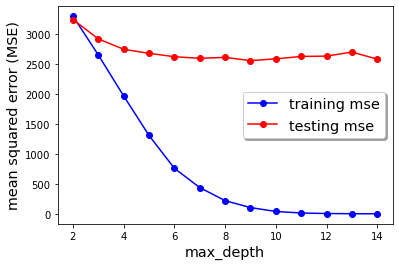

In [103]:
# Plot the simple split measures (train_mse & test_mse) 
plt.plot(depth_range, train_mse, 'bo-', label ='training mse')
plt.plot(depth_range, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

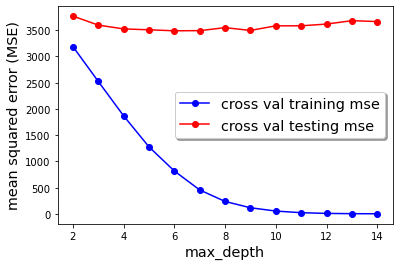

In [104]:
# Plot the cross validation measures (cross_val_train_mse & cross val_test_mse) 
plt.plot(depth_range, cross_val_train_mse, 'bo-', label ='cross val training mse')
plt.plot(depth_range, cross_val_test_mse, 'ro-', label = 'cross val testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [101]:
xgr_final = XGBRegressor(alpha=0.1, booster='gbtree', eta=0.2, subsample=1, use_label_encoder=False, max_depth=3,
                         random_state=1)
xgr_final.fit(X2_train, y2_train.ravel())

print('the training mean squared error is: ', mean_squared_error(xgr_final.predict(X2_train), y2_train))
print('the testing mean squared error is: ', mean_squared_error(xgr_final.predict(X2_test), y2_test))

print('the training root mean squared error is: ', sqrt(mean_squared_error(xgr_final.predict(X2_train), y2_train)))
print('the testing root mean squared error is: ', sqrt(mean_squared_error(xgr_final.predict(X2_test), y2_test)))

train_R2 = xgr_final.score(X2_train, y2_train)
print('training R^2 value is: ', train_R2)
test_R2 = xgr_final.score(X2_test, y2_test)
print('testing R^2 value is: ', test_R2)

the training mean squared error is:  2651.3129233307263
the testing mean squared error is:  2919.5309477433484
the training root mean squared error is:  51.490901364519985
the testing root mean squared error is:  54.03268406939774
training R^2 value is:  0.6508900702623279
testing R^2 value is:  0.6003869282762249
